# Importing the required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

# Reading the dataset

In [3]:
df = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-6_Perceptron_and_Logistic_Regression\sonar (1).all-data",header=None)

# A glimpse into the dataset

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

# Segreggating the columns

In [6]:
target = 60
numerical = df.columns[0:59]

# Test-Train Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df,
    df[target],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)

In [8]:
X_train.pop(60)
X_test.pop(60)

12     R
80     R
33     R
5      R
187    M
83     R
116    M
122    M
90     R
154    M
45     R
156    M
52     R
189    M
96     R
86     R
204    M
37     R
66     R
18     R
170    M
Name: 60, dtype: object

# Training the Multilayer Perceptron

In [9]:
classifier = MLPClassifier()

In [10]:
classifier.fit(X_train,y_train)

C:\Users\mitug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [11]:
y_pred_train = classifier.predict(X_train)
metrics.accuracy_score(y_train,y_pred_train)

0.8983957219251337

In [12]:
y_pred_test = classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.8571428571428571

In [13]:
metrics.confusion_matrix(y_pred_test, y_test)

array([[ 7,  2],
       [ 1, 11]], dtype=int64)

# The activation function

In [14]:
x = []
for i in ['identity', 'logistic', 'tanh', 'relu']:
    classifier = MLPClassifier(activation=i)
    classifier.fit(X_train,y_train)
    x.append([i,metrics.accuracy_score(y_train,classifier.predict(X_train))])

In [16]:
pd.DataFrame(x)

,0,1
0,identity,0.860963
1,logistic,0.812834
2,tanh,0.893048
3,relu,0.877005


The default iterations are not sufficient to achieve optimum result and hence we will now tune the max_iter hyperparameter

# Tuning the Max Iterations Hyperparameter

In [17]:
x = []
for i in ['identity', 'logistic', 'tanh', 'relu']:
  for j in range(1600,2001,200):
   for k in ['lbfgs', 'sgd', 'adam']:
    print(i,j,k)
    classifier = MLPClassifier(activation=i,max_iter=j,solver=k,random_state=0)
    classifier.fit(X_train,y_train)
    a = metrics.accuracy_score(y_train,classifier.predict(X_train))
    b = metrics.accuracy_score(y_test,classifier.predict(X_test))
    x.append([i,k,a,b,a-b,j])

In [19]:
df = pd.DataFrame(x,columns=["Activation Function","Solver","Train Accuracy","Test Accuracy","Difference in Test and Train","Max. Iterations"])

- All the set of parameters for which test accuracy is greater than the train accuracy are inappropriate.
- At max_iter = 1800 all the activation functions and solvers pairs have their optimisation converged.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Activation Function           36 non-null     object 
 1   Solver                        36 non-null     object 
 2   Train Accuracy                36 non-null     float64
 3   Test Accuracy                 36 non-null     float64
 4   Difference in Test and Train  36 non-null     float64
 5   Max. Iterations               36 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.8+ KB


In [21]:
df.drop(df[(df['Max. Iterations'] < 1800) | (df['Difference in Test and Train'] > 0.1)].index, inplace = True,axis=0)

In [22]:
df.sort_values(by=['Difference in Test and Train'])

,Activation Function,Solver,Train Accuracy,Test Accuracy,Difference in Test and Train,Max. Iterations
12,logistic,lbfgs,1.0,0.904762,0.095238,1800
14,logistic,adam,1.0,0.904762,0.095238,1800
15,logistic,lbfgs,1.0,0.904762,0.095238,2000
17,logistic,adam,1.0,0.904762,0.095238,2000
21,tanh,lbfgs,1.0,0.904762,0.095238,1800
24,tanh,lbfgs,1.0,0.904762,0.095238,2000


- All of these models can generalise the knowledge they learnt from the train dataset relatively better than the other.

- On sorting in ascending order of Difference in Test and Train, we find the first one where:
  1. Activation function  = logistic
  2. Solver = lbfgs
  3. max_iter = 2000

# Hypertuning of number of hidden layers in the MLP

In [23]:
tr = []
tst = []
x_ticks = []
for i in range(100,400,50):
    for j in range(100,400,50):
        classifier = MLPClassifier(hidden_layer_sizes=(i,j),activation='logistic',max_iter=1800,solver='lbfgs',random_state=0)
        classifier.fit(X_train,y_train)
        tr.append(metrics.accuracy_score(y_train,classifier.predict(X_train)))
        tst.append(metrics.accuracy_score(y_test,classifier.predict(X_test)))
        x_ticks.append(str((i,j)))

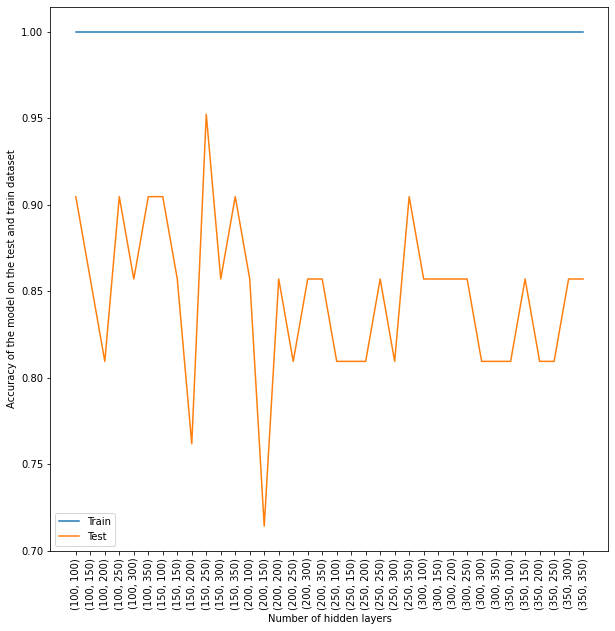

In [31]:
plt.figure(figsize=(10,10))
plt.plot(range(len(tr)),tr)
plt.plot(range(len(tst)),tst)
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(["Test","Train"])
plt.xticks(range(len(x_ticks)),x_ticks,rotation=90) 
plt.legend(["Train","Test"])
plt.show()

- Its evident from graph that at hidden_layers=(150,250), the model gets tuned with the highest accuracy.

We can tune other parameters like learning_rate, however, for a dataset with 208 entries tuning multiple parameters might overfit the model. Hence, we coin the finally tuned model as in the following code cell :

In [26]:
classifier = MLPClassifier(hidden_layer_sizes=(150,250),activation='logistic',max_iter=1800,solver='lbfgs',random_state=0)
classifier.fit(X_train,y_train)
a = metrics.accuracy_score(y_train,classifier.predict(X_train))
b = metrics.accuracy_score(y_test,classifier.predict(X_test))

In [27]:
print("Train Accuracy = ",a);
print("Test Accuracy = ",b);

Train Accuracy =  1.0
Test Accuracy =  0.9523809523809523
